In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,NearestNeighbors
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,BaggingClassifier,BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler,Normalizer,MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Activation,Dropout,Flatten


In [2]:
data=pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(372450, 785)

In [4]:
import math
math.sqrt(785)

28.0178514522438

In [5]:
a=data.iloc[11000,1:].values
a=a.reshape(28,28).astype('uint8')

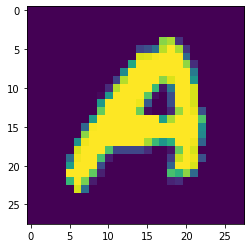

In [6]:
plt.imshow(a)

In [7]:
data=data.rename(columns={"0":"Target"})
data.head()

,Target,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data["Target"].value_counts().sort_index()

0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: Target, dtype: int64

In [9]:
x=data.drop(["Target"],1)
y=data.iloc[:,0]
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: Target, Length: 372450, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [11]:
model=Sequential()
model.add(Dense(256,input_dim=784,activation='sigmoid'))
model.add(Dense(132,activation='relu'))
model.add(Dense(64,activation='tanh'))

model.add(Dense(26,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from keras.utils import to_categorical
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [13]:
model.fit(x_train,Y_train,epochs=10,verbose=1)

Epoch 1/10
8148/8148 [==============================] - 26s 3ms/step - loss: 0.8929 - accuracy: 0.7426
Epoch 2/10
8148/8148 [==============================] - 26s 3ms/step - loss: 0.4368 - accuracy: 0.8692
Epoch 3/10
8148/8148 [==============================] - 25s 3ms/step - loss: 0.3671 - accuracy: 0.8893
Epoch 4/10
8148/8148 [==============================] - 24s 3ms/step - loss: 0.3309 - accuracy: 0.9006
Epoch 5/10
8148/8148 [==============================] - 25s 3ms/step - loss: 0.3081 - accuracy: 0.9080
Epoch 6/10
8148/8148 [==============================] - 25s 3ms/step - loss: 0.2936 - accuracy: 0.9111
Epoch 7/10
8148/8148 [==============================] - 24s 3ms/step - loss: 0.2888 - accuracy: 0.9137
Epoch 8/10
8148/8148 [==============================] - 24s 3ms/step - loss: 0.2654 - accuracy: 0.9193
Epoch 9/10
8148/8148 [==============================] - 24s 3ms/step - loss: 0.2609 - accuracy: 0.9217
Epoch 10/10
8148/8148 [==============================] - 25s 3ms/step - l

In [14]:
model.evaluate(x_test,Y_test)

3492/3492 [==============================] - 7s 2ms/step - loss: 0.2524 - accuracy: 0.9254


[0.2523907423019409, 0.9254485964775085]

In [15]:
model.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([15, 14, 13, ...,  1, 15, 18])

In [16]:
y_test

208959    15
170349    14
76815      7
154368    14
358165    24
          ..
257218    18
28216      2
18030      1
202701    15
278447    18
Name: Target, Length: 111735, dtype: int64